In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'p.a. bolzano'

path_data = f'{path_root}/data'
path_img_root = f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,21,P.A. Bolzano,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,1.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,14.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2021-02-28T17:00:00,21,P.A. Bolzano,218,33,251,6451,6702,-82,226,...,5.0,7151.0,432.0,-88.0,13.15,3.75,3.16,52.31,3.12,-1.21
370,2021-03-01T17:00:00,21,P.A. Bolzano,218,31,249,6477,6726,24,121,...,8.0,13192.0,191.0,26.0,12.45,3.70,0.92,63.35,-6.06,0.36
371,2021-03-02T17:00:00,21,P.A. Bolzano,208,31,239,6653,6892,166,236,...,4.0,21258.0,235.0,176.0,12.97,3.47,1.11,100.43,0.00,2.47
372,2021-03-03T17:00:00,21,P.A. Bolzano,205,33,238,6525,6763,-129,280,...,1.0,17322.0,401.0,-128.0,13.87,3.52,1.62,69.83,6.45,-1.87


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 4, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 253
Nuovi tamponi: 21055.0
Percentuale nuovi positivi/nuovi tamponi: 1.2 %
Nuovi guariti: 355.0
Nuovi deceduti: 4.0
Variazione positivi ricoverati con sintomi: -8.0
Variazione positivi in terapia intensiva: 3.0
Variazione positivi in isolamento dimiciliare: -101.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 4, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-03T17:00:00,21,P.A. Bolzano,186,24,210,10640,10850,12,96,...,5.0,704.0,185.0,2.0,11.43,1.94,13.64,51.89,0.00,0.11
1,2021-01-04T17:00:00,21,P.A. Bolzano,197,25,222,10602,10824,-26,37,...,5.0,1205.0,316.0,-38.0,11.26,2.05,3.07,11.71,4.17,-0.24
2,2021-01-05T17:00:00,21,P.A. Bolzano,203,27,230,10683,10913,89,148,...,2.0,1408.0,231.0,81.0,11.74,2.11,10.51,64.07,8.00,0.82
3,2021-01-06T17:00:00,21,P.A. Bolzano,203,27,230,10875,11105,192,320,...,4.0,2561.0,549.0,192.0,11.74,2.07,12.50,58.29,0.00,1.76
4,2021-01-07T17:00:00,21,P.A. Bolzano,205,25,230,11021,11251,146,263,...,1.0,1832.0,575.0,146.0,10.87,2.04,14.36,45.74,-7.41,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-28T17:00:00,21,P.A. Bolzano,218,33,251,6451,6702,-82,226,...,5.0,7151.0,432.0,-88.0,13.15,3.75,3.16,52.31,3.12,-1.21
57,2021-03-01T17:00:00,21,P.A. Bolzano,218,31,249,6477,6726,24,121,...,8.0,13192.0,191.0,26.0,12.45,3.70,0.92,63.35,-6.06,0.36
58,2021-03-02T17:00:00,21,P.A. Bolzano,208,31,239,6653,6892,166,236,...,4.0,21258.0,235.0,176.0,12.97,3.47,1.11,100.43,0.00,2.47
59,2021-03-03T17:00:00,21,P.A. Bolzano,205,33,238,6525,6763,-129,280,...,1.0,17322.0,401.0,-128.0,13.87,3.52,1.62,69.83,6.45,-1.87


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

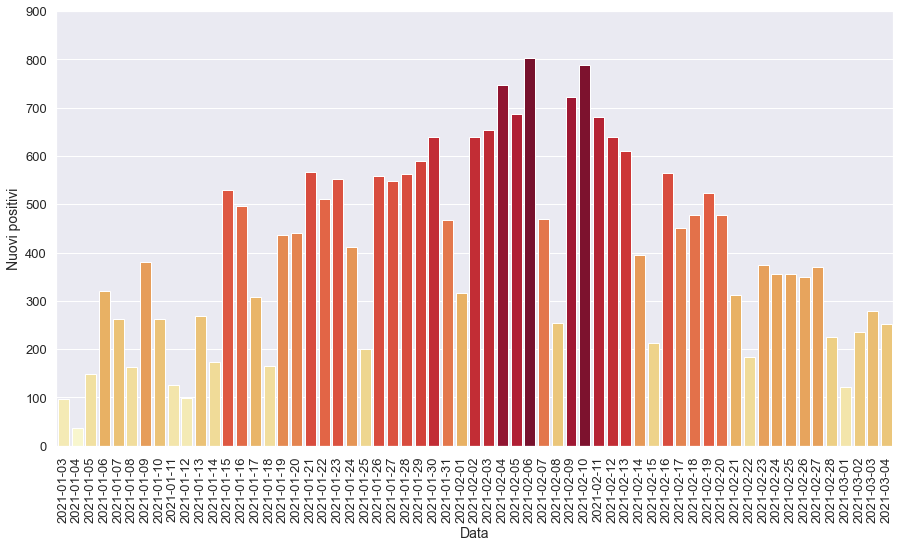

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

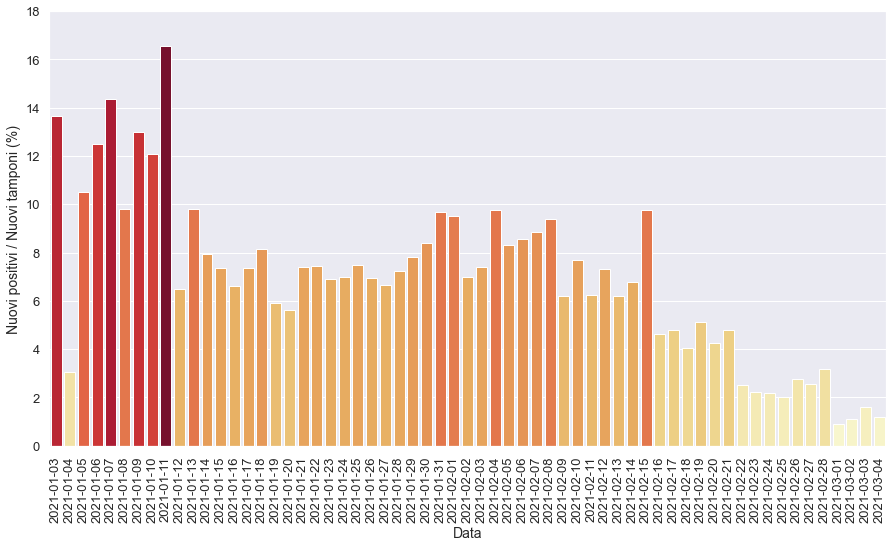

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

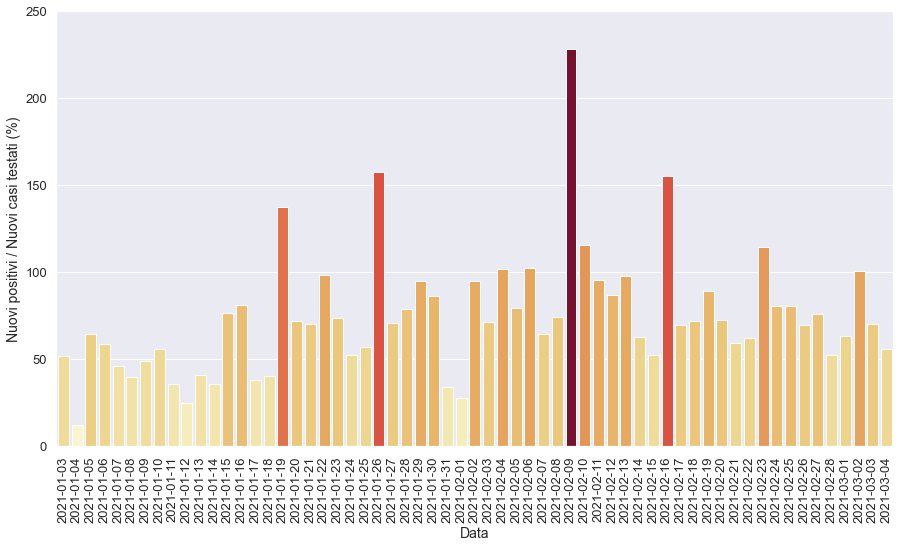

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

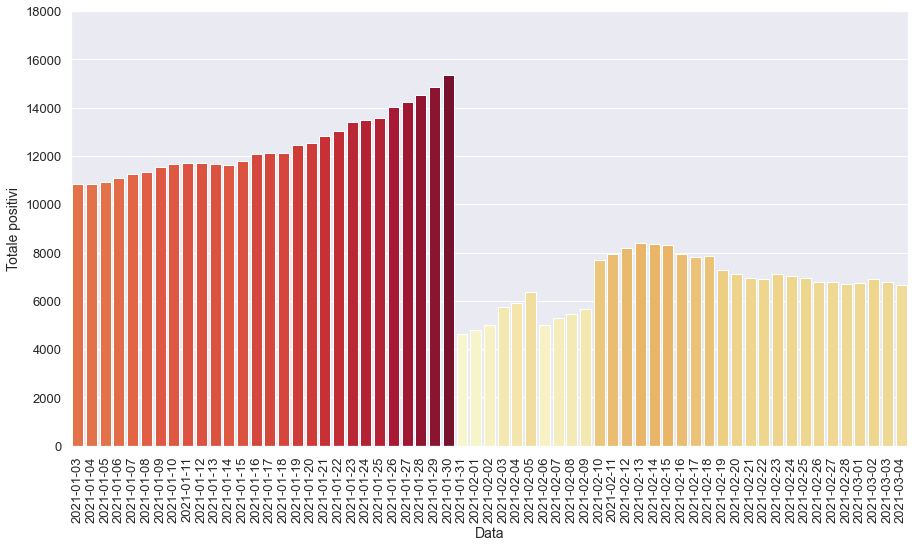

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

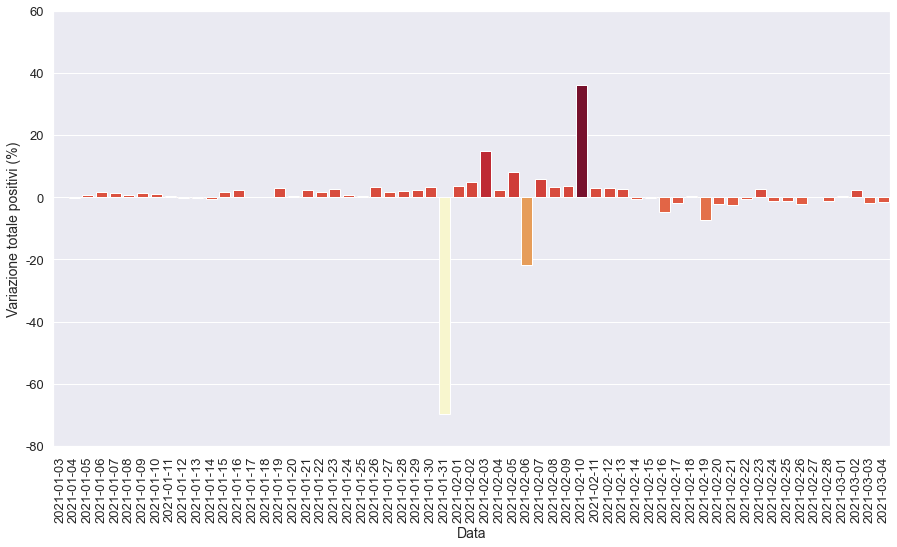

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

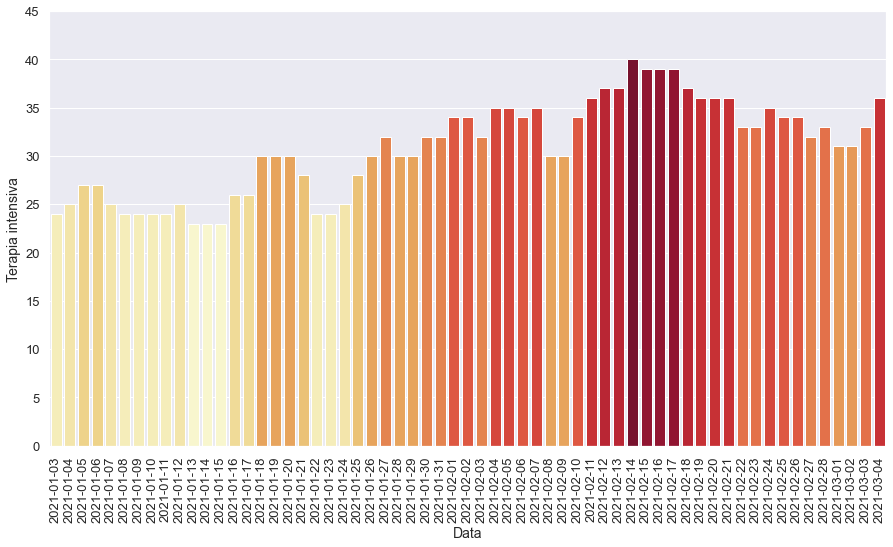

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

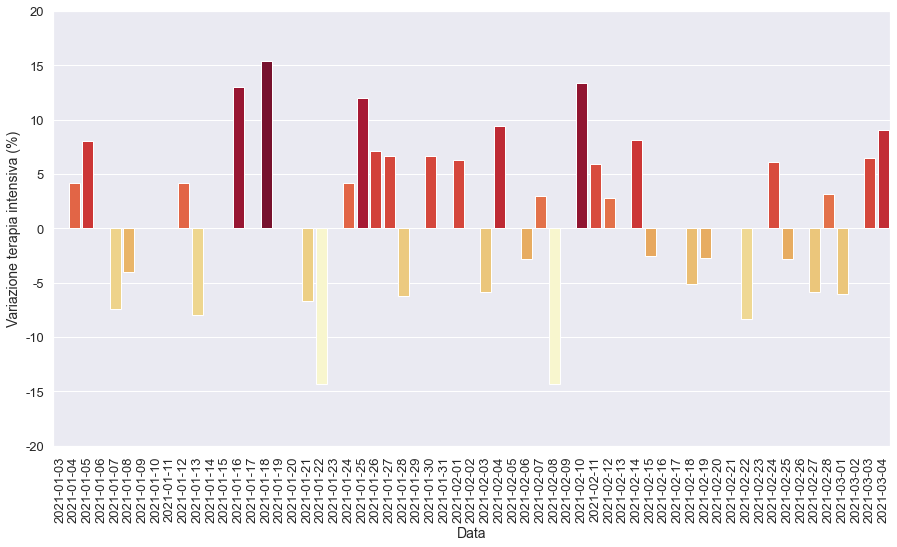

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

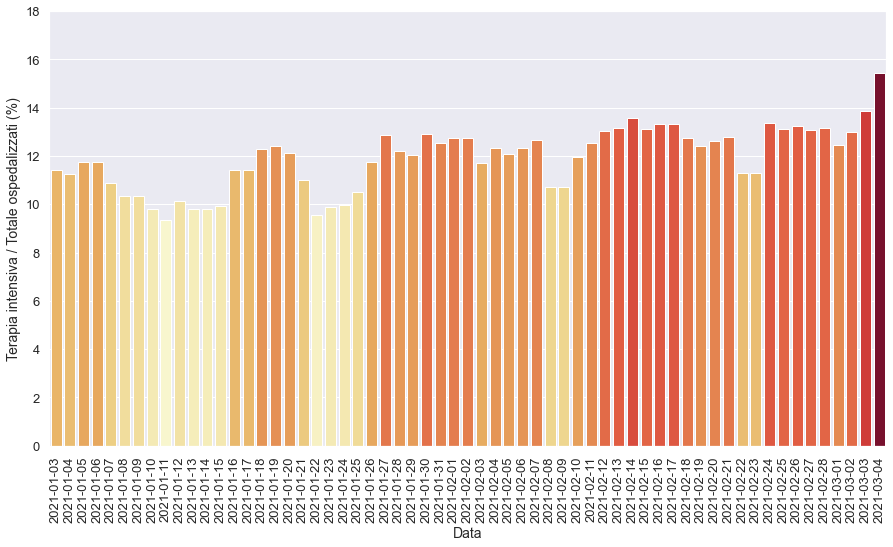

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

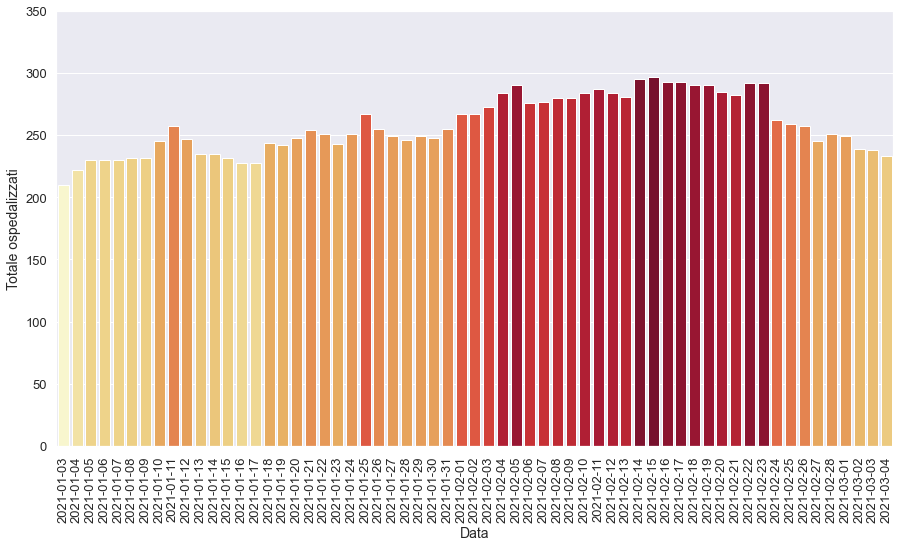

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

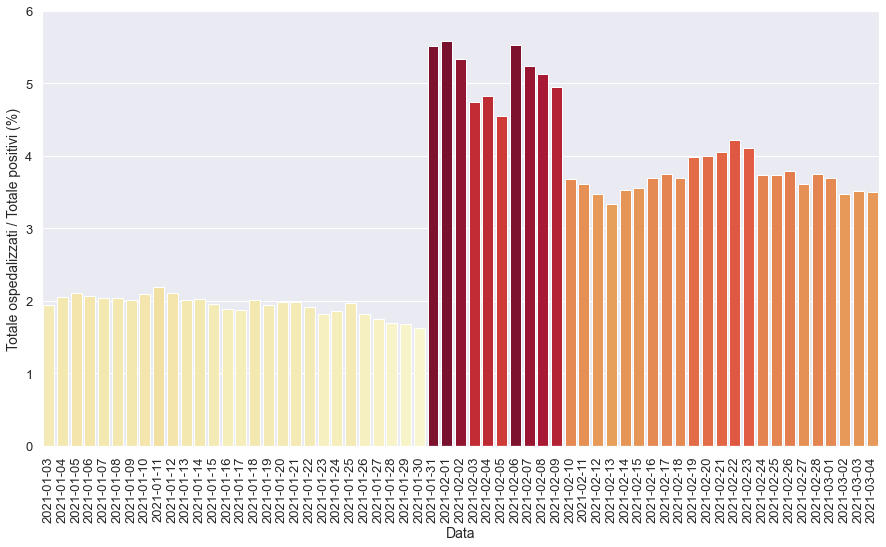

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

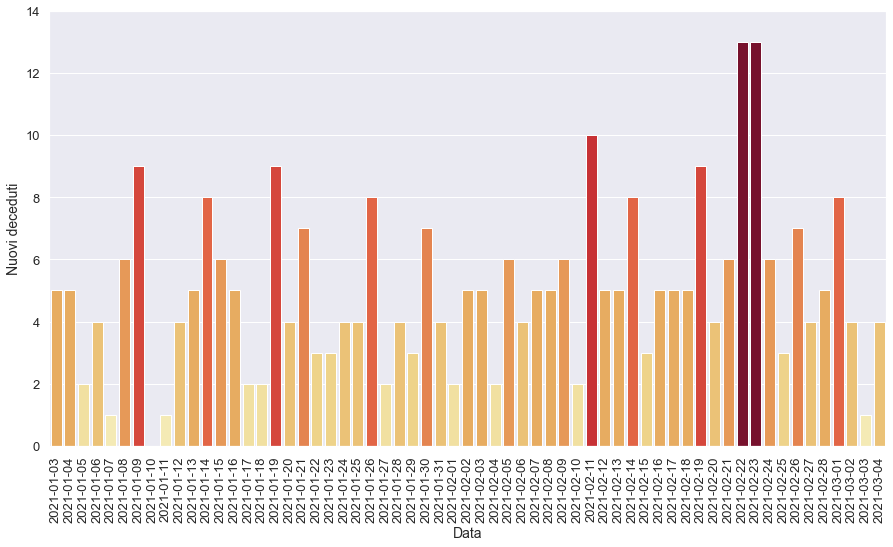

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

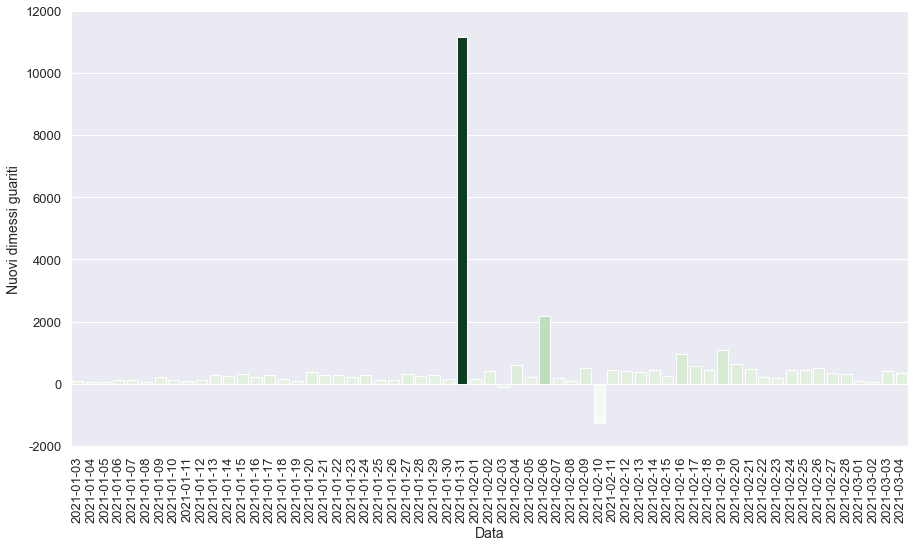

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-02T17:00:00,21,P.A. Bolzano,233,34,267,4741,5008,229,639,...,5.0,9151.0,676.0,229.0,12.73,5.33,6.98,94.53,0.00,4.79
1,2021-02-03T17:00:00,21,P.A. Bolzano,241,32,273,5477,5750,742,653,...,5.0,8852.0,919.0,736.0,11.72,4.75,7.38,71.06,-5.88,14.82
2,2021-02-04T17:00:00,21,P.A. Bolzano,249,35,284,5607,5891,141,747,...,2.0,7656.0,734.0,130.0,12.32,4.82,9.76,101.77,9.38,2.45
3,2021-02-05T17:00:00,21,P.A. Bolzano,255,35,290,6083,6373,482,687,...,6.0,8261.0,866.0,476.0,12.07,4.55,8.32,79.33,0.00,8.18
4,2021-02-06T17:00:00,21,P.A. Bolzano,242,34,276,4716,4992,-1381,802,...,4.0,9350.0,786.0,-1367.0,12.32,5.53,8.58,102.04,-2.86,-21.67
5,2021-02-07T17:00:00,21,P.A. Bolzano,242,35,277,5012,5289,297,470,...,5.0,5315.0,734.0,296.0,12.64,5.24,8.84,64.03,2.94,5.95
6,2021-02-08T17:00:00,21,P.A. Bolzano,250,30,280,5176,5456,167,255,...,5.0,2717.0,344.0,164.0,10.71,5.13,9.39,74.13,-14.29,3.16
7,2021-02-09T17:00:00,21,P.A. Bolzano,250,30,280,5376,5656,200,721,...,6.0,11591.0,316.0,200.0,10.71,4.95,6.22,228.16,0.00,3.67
8,2021-02-10T17:00:00,21,P.A. Bolzano,250,34,284,7424,7708,2052,789,...,2.0,10252.0,683.0,2048.0,11.97,3.68,7.70,115.52,13.33,36.28
9,2021-02-11T17:00:00,21,P.A. Bolzano,251,36,287,7662,7949,241,680,...,10.0,10916.0,713.0,238.0,12.54,3.61,6.23,95.37,5.88,3.13


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

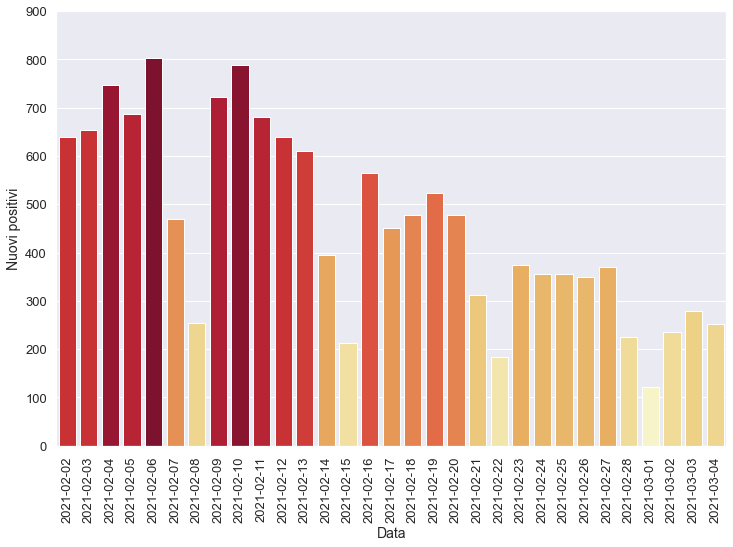

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

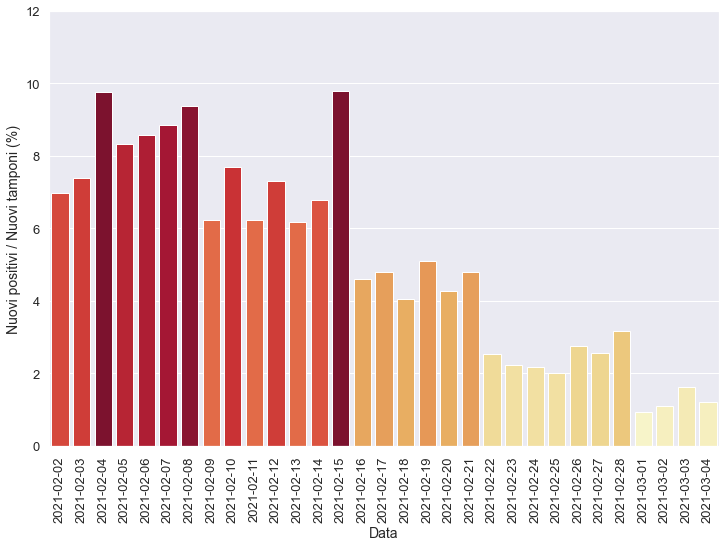

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

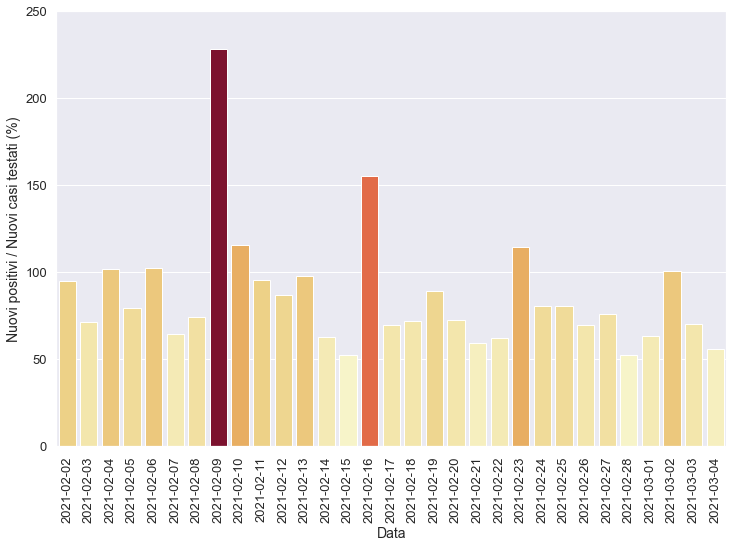

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

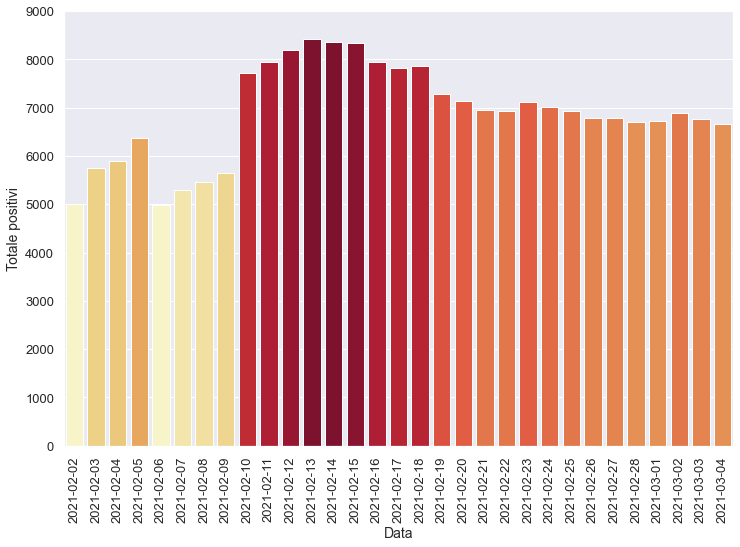

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

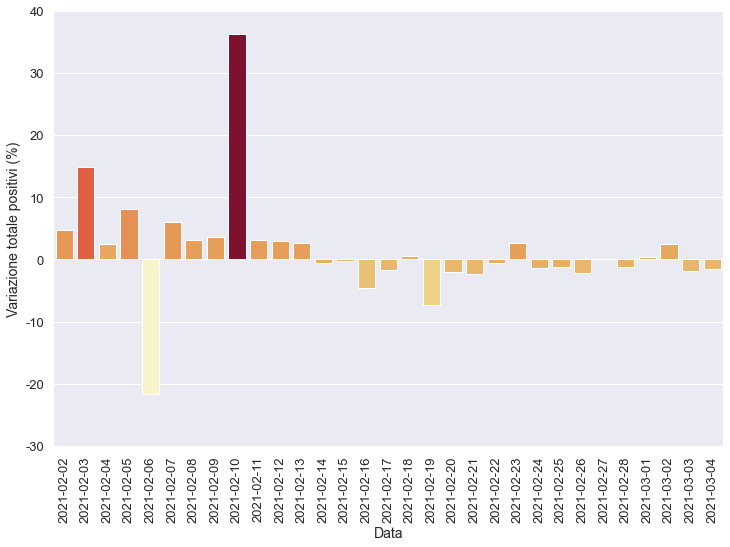

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

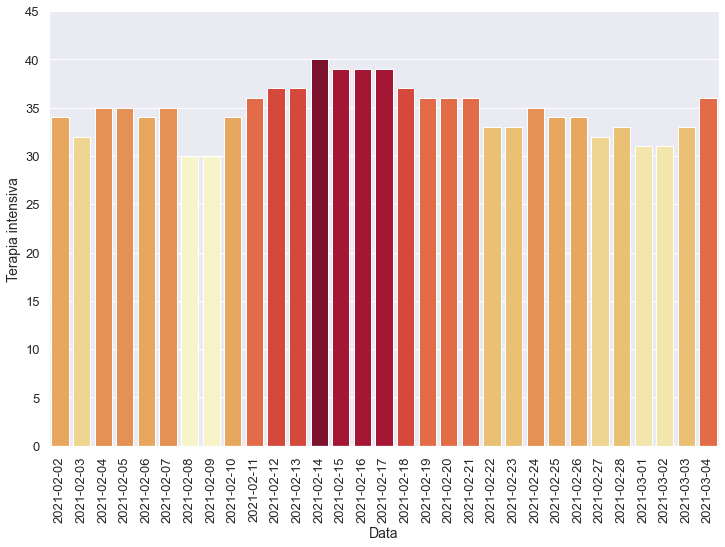

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

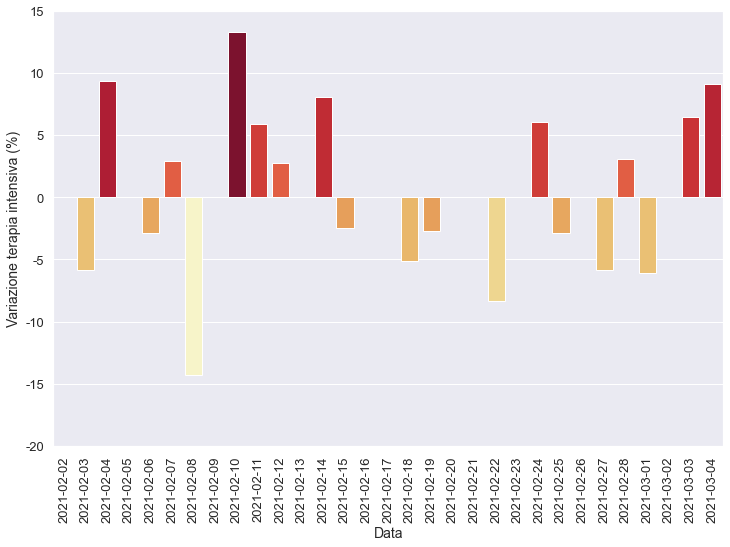

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

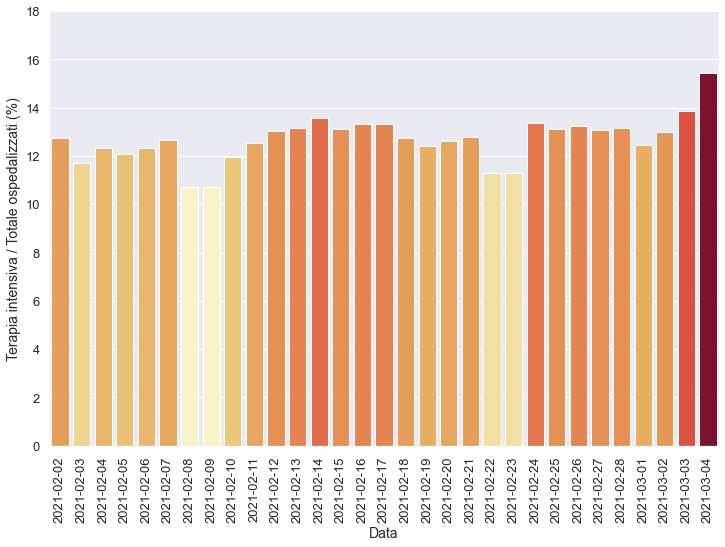

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

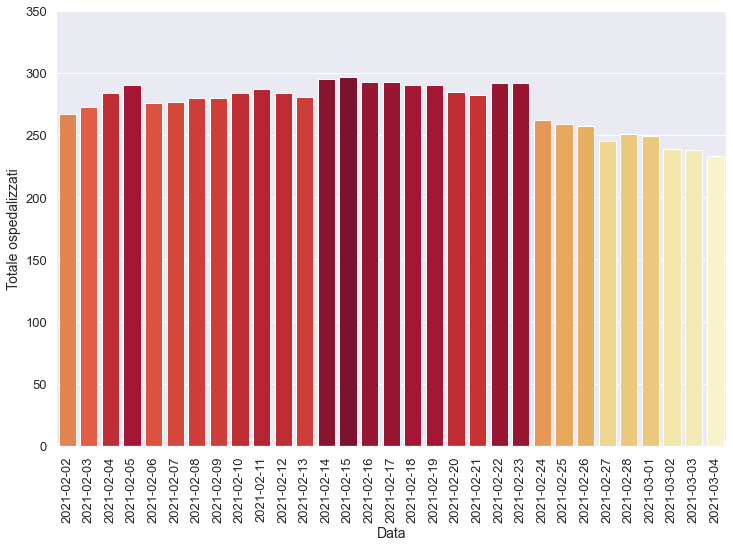

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

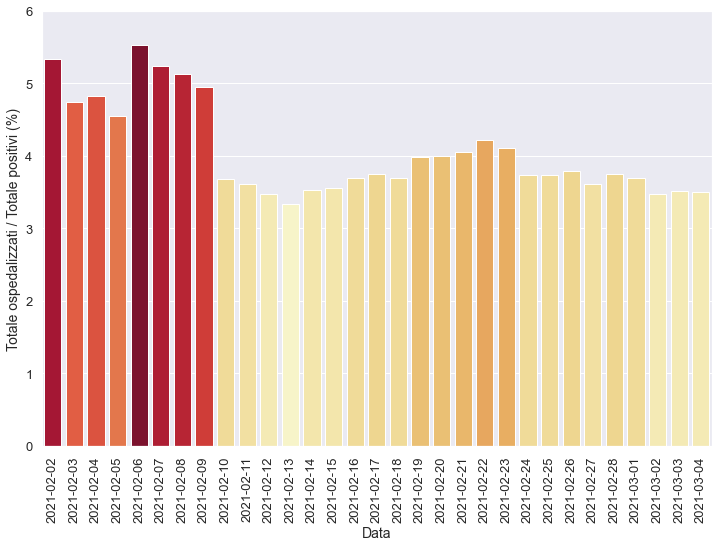

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

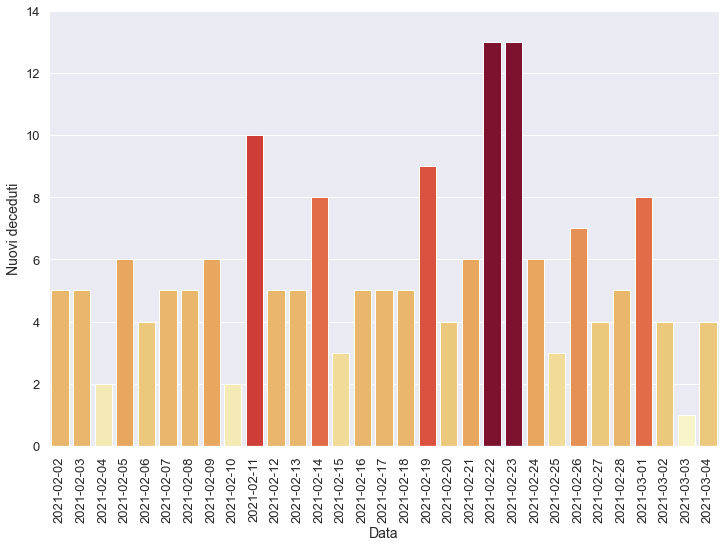

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

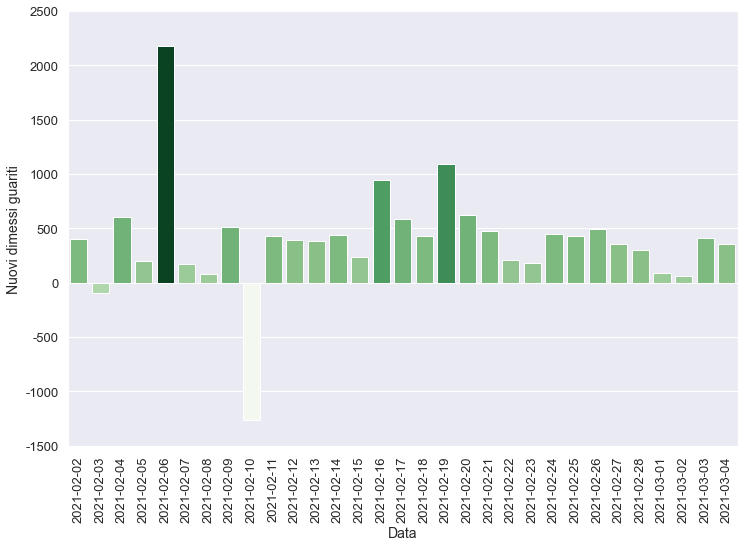

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-25T17:00:00,21,P.A. Bolzano,225,34,259,6670,6929,-82,355,...,3.0,17777.0,443.0,-79.0,13.13,3.74,2.00,80.14,-2.86,-1.17
1,2021-02-26T17:00:00,21,P.A. Bolzano,223,34,257,6518,6775,-154,350,...,7.0,12745.0,502.0,-152.0,13.23,3.79,2.75,69.72,0.00,-2.22
2,2021-02-27T17:00:00,21,P.A. Bolzano,213,32,245,6539,6784,9,371,...,4.0,14425.0,490.0,21.0,13.06,3.61,2.57,75.71,-5.88,0.13
3,2021-02-28T17:00:00,21,P.A. Bolzano,218,33,251,6451,6702,-82,226,...,5.0,7151.0,432.0,-88.0,13.15,3.75,3.16,52.31,3.12,-1.21
4,2021-03-01T17:00:00,21,P.A. Bolzano,218,31,249,6477,6726,24,121,...,8.0,13192.0,191.0,26.0,12.45,3.70,0.92,63.35,-6.06,0.36
5,2021-03-02T17:00:00,21,P.A. Bolzano,208,31,239,6653,6892,166,236,...,4.0,21258.0,235.0,176.0,12.97,3.47,1.11,100.43,0.00,2.47
6,2021-03-03T17:00:00,21,P.A. Bolzano,205,33,238,6525,6763,-129,280,...,1.0,17322.0,401.0,-128.0,13.87,3.52,1.62,69.83,6.45,-1.87
7,2021-03-04T17:00:00,21,P.A. Bolzano,197,36,233,6424,6657,-106,253,...,4.0,21055.0,456.0,-101.0,15.45,3.50,1.20,55.48,9.09,-1.57


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

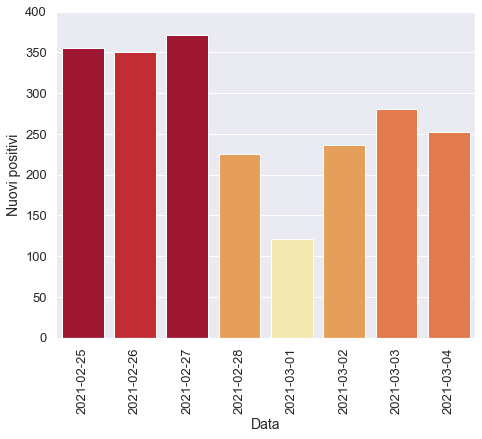

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

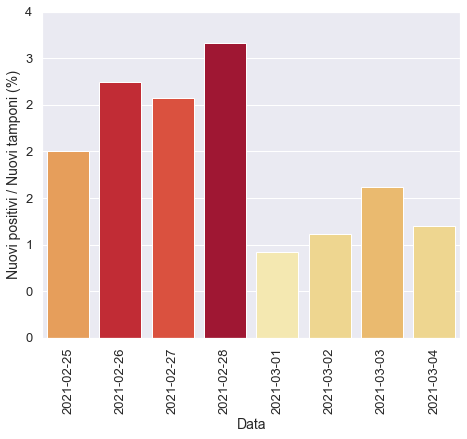

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

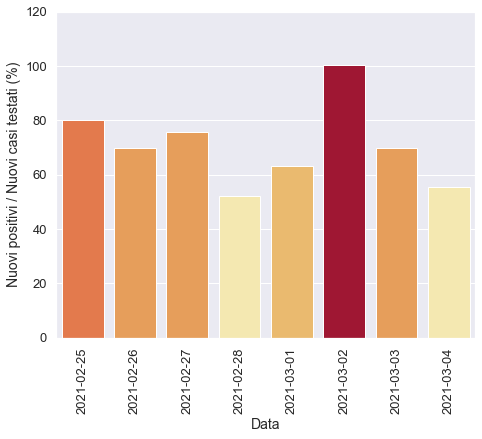

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

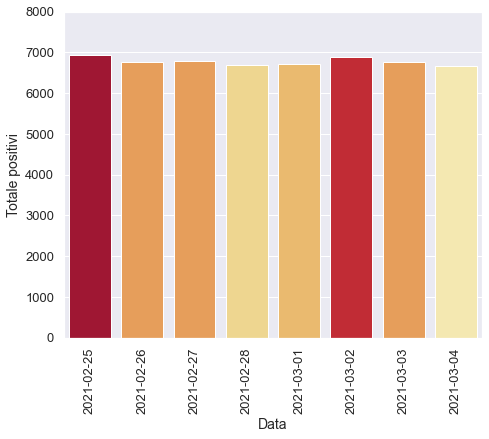

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

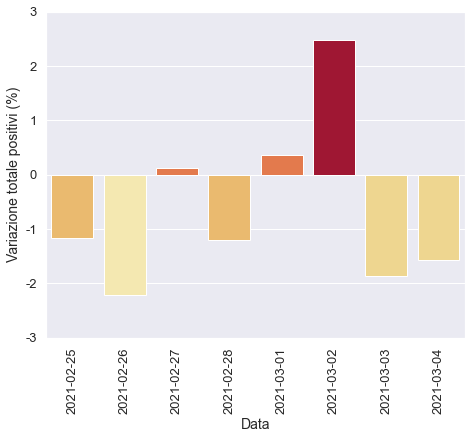

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

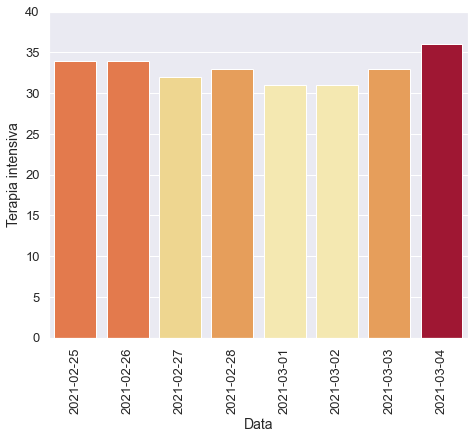

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

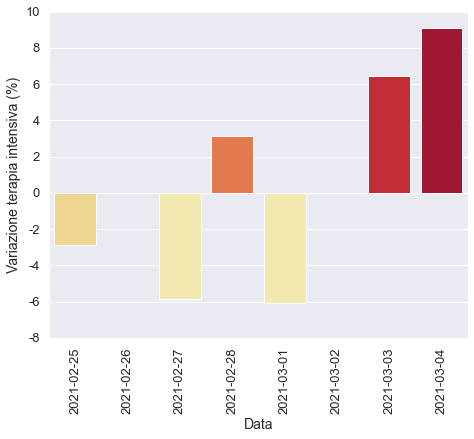

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

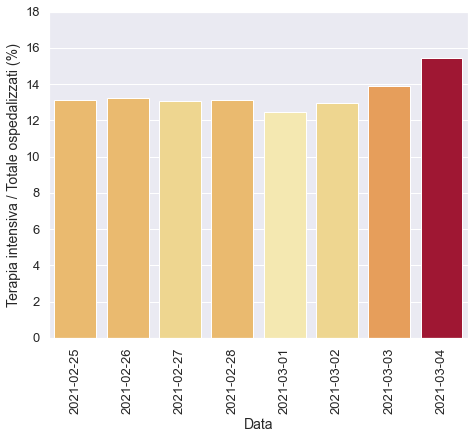

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

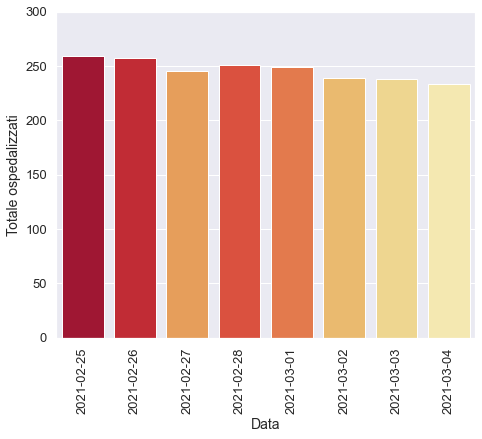

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

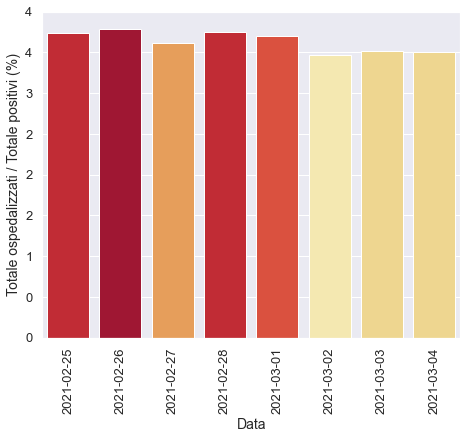

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

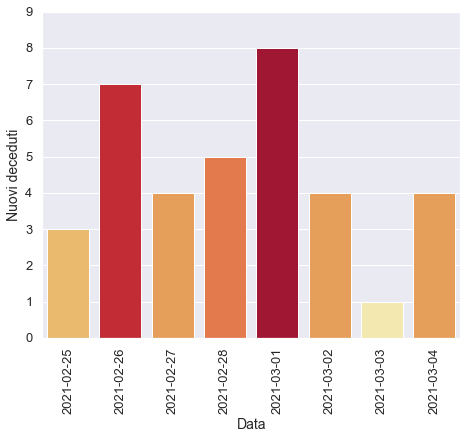

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

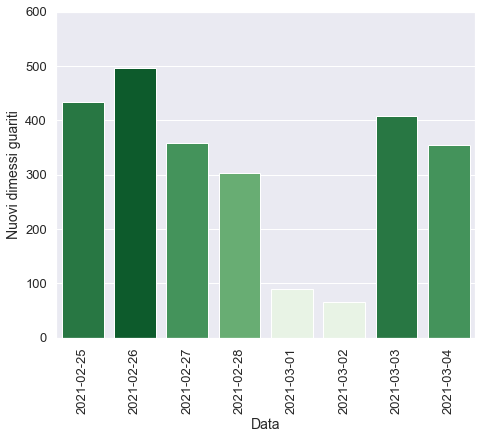

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)